In [1]:
from glob import glob
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd
# from scipy import stats

In [2]:
Denoised_whole_brain=  [1.5565151, 1.5345976, 1.5014223, 1.4694272, 1.4020649, 1.5048907, 1.5032846, 1.4447345, 1.4576083, 1.5268013, 1.4467192, 1.5505192, 1.579858, 1.4765248, 1.4989482, 1.4950007, 1.4530497, 1.4957049, 1.4547089, 1.4589665, 1.438335, 1.4676721, 1.4426196, 1.5579067, 1.5207237, 1.4449545, 1.4731017, 1.5470222, 1.4542542, 1.5013456, 1.5565315, 1.4950352, 1.4905022, 1.5320894, 1.4927493, 1.5035532, 1.509691, 1.4843371, 1.4567341, 1.5377197, 1.5197538, 1.4939473, 1.4272268, 1.5279266, 1.5012612, 1.5141623, 1.508422, 1.5553617, 1.4621083, 1.4790624, 1.5248971, 1.5160092, 1.5501144, 1.4838616, 1.4912219, 1.5209916, 1.5170318, 1.4795692, 1.4490834, 1.4759741, 1.5500114, 1.4814643, 1.4685467, 1.4973902, 1.4849364]
Denoised_gray_matter=  [1.5850601, 1.6002469, 1.5688854, 1.5223205, 1.5408134, 1.5502951, 1.5585854, 1.5315286, 1.5580031, 1.5468787, 1.5086229, 1.624806, 1.6176997, 1.5262551, 1.5733823, 1.5622388, 1.5271541, 1.5582515, 1.5319111, 1.555132, 1.4834297, 1.5196465, 1.5095813, 1.6337317, 1.5554862, 1.5269845, 1.5390493, 1.6089936, 1.5322411, 1.5753369, 1.5699415, 1.52435, 1.5423514, 1.6137781, 1.5649372, 1.5384792, 1.544181, 1.5415008, 1.5522438, 1.5906825, 1.5192646, 1.534216, 1.4888577, 1.5834793, 1.5251864, 1.5372643, 1.5350834, 1.5696157, 1.5484779, 1.5277708, 1.588991, 1.5964044, 1.6092869, 1.5624427, 1.555863, 1.5789077, 1.5406139, 1.5406171, 1.5304185, 1.5381501, 1.5993918, 1.5408126, 1.5020566, 1.5663593, 1.5247097]
Denoised_white_matter=  [1.0884743, 1.0807034, 1.0477513, 1.038045, 0.9830838, 1.0492715, 1.0880779, 0.986145, 1.0033878, 1.0058948, 1.0985581, 1.0924183, 1.1132658, 1.0119659, 1.0620922, 1.0799078, 1.0615044, 1.0265656, 1.0338469, 1.0533023, 1.0102782, 1.0316956, 1.0389582, 1.1327864, 1.09648, 1.0455912, 1.0119311, 1.0753437, 1.0843501, 1.0621437, 1.0904486, 1.0475448, 1.0838478, 1.1382663, 1.0436286, 1.0310723, 1.0612568, 1.0598004, 0.9949506, 1.0953702, 1.0419087, 1.0675496, 1.0174392, 1.1239262, 1.0267683, 1.026347, 1.0059311, 1.0525405, 1.0835706, 1.0083388, 1.0723319, 1.1081649, 1.1543301, 1.1165563, 1.0474558, 1.0395279, 1.0493784, 1.0615107, 1.0232542, 1.0470567, 1.0696298, 1.0302054, 1.005185, 1.0192508, 1.0474042]
GT_whole_brain=  [1621.5957060444764, 1609.6802355318782, 1545.4767646116888, 1561.4691905703876, 1476.3936008030628, 1600.7588377273273, 1590.494730448876, 1524.7213647427336, 1516.059734135147, 1557.2523936457176, 1518.3986499700575, 1560.2214646240589, 1521.6214574486505, 1560.9657134202669, 1547.084725388674, 1590.2486985988298, 1526.5762194834056, 1486.86294682343, 1476.4102027511915, 1539.4264484069954, 1514.9479373603835, 1555.6154505696325, 1478.1852768932856, 1591.9688670424491, 1605.2851538649925, 1549.8171849505998, 1565.1334723524617, 1599.7571394816061, 1547.1599370109095, 1542.0822718331137, 1641.0086456121905, 1610.2640503408625, 1574.6419375310002, 1569.3560579865305, 1580.6006467221239, 1562.3438292780534, 1626.070911400401, 1596.1554036744687, 1513.4125195799872, 1562.6141155200855, 1620.6174369595583, 1587.7212122094818, 1506.2099563789543, 1592.049147612452, 1578.083743793321, 1585.7377892967625, 1572.6456018777164, 1632.033790015136, 1518.0651615928, 1555.378526390394, 1608.2356638978722, 1574.9484849192565, 1596.1681671806762, 1568.6346910349157, 1571.6833417573694, 1594.271001302436, 1602.7799603992194, 1566.9022212819207, 1551.1500780058063, 1498.5406720220171, 1649.0648922408118, 1596.0149690839914, 1532.730832335786, 1543.4671589461154, 1593.2060769397115]
GT_gray_matter=  [1600.4723748013305, 1621.8547211224295, 1579.1537781135903, 1602.9156703924373, 1621.1344805489907, 1612.3903680998003, 1627.0059818676634, 1615.3086167192264, 1600.8095992646731, 1553.541489704986, 1586.6439444726889, 1622.3133065448158, 1528.2436380831448, 1604.977603684862, 1616.9348246146742, 1626.9575219045244, 1607.8127627475205, 1533.2985143231035, 1540.0666830455104, 1618.5933808347404, 1547.70288100324, 1605.7277307190825, 1531.4779580650743, 1642.733931888556, 1625.567165728158, 1611.4524755582058, 1617.9477380964224, 1634.5621456816546, 1611.7903404456638, 1596.240824398399, 1607.4047218177047, 1622.85722787283, 1613.4965211182537, 1635.6107894304316, 1624.6794139625276, 1584.081392227681, 1642.3548695158893, 1612.148373472533, 1595.7688808084133, 1601.5992592127498, 1573.9036203779735, 1606.7467053258447, 1568.6514318332413, 1626.7266929064847, 1583.350848393054, 1584.8496973502831, 1553.9498919246184, 1613.0833242118395, 1601.8636005345688, 1576.513731026667, 1629.0394251122898, 1644.6717252789372, 1631.4459247496952, 1622.7605839343198, 1589.973523477904, 1629.2881814353316, 1616.9851542635445, 1618.8919913021505, 1617.7558120205058, 1541.160568251633, 1645.3231258055046, 1608.9824182236512, 1544.5849800690949, 1590.2270114040057, 1610.3371274138267]
GT_white_matter=  [1082.4308843354215, 1076.4440781876851, 1020.155464601521, 1070.0099453835514, 991.0474571581766, 1064.982407763554, 1115.070515702615, 993.3433145651314, 1010.7493726547659, 1002.5041442474914, 1109.4234567688363, 1071.6716222882744, 1030.6812450892207, 1036.6225492615145, 1063.00566532637, 1093.6509372754174, 1088.8259644370848, 997.8364471162666, 1019.9768948153297, 1086.7818825843203, 1013.049158377071, 1047.0975817515427, 1034.580860984376, 1125.2719157324173, 1118.5203257553937, 1086.4874127743617, 1039.9238202139084, 1056.5932074891628, 1107.623001178745, 1051.821186436298, 1095.6460598041049, 1072.981714598026, 1113.0335129431421, 1127.8195235821054, 1071.5708011051495, 1070.714777767718, 1098.2242000524889, 1085.2583209865195, 1011.2219484602844, 1083.536581944362, 1053.803408740379, 1101.028638459325, 1042.21795478861, 1150.0012973872738, 1039.6031554873928, 1035.8627476253155, 996.1396898603699, 1071.1202280721627, 1100.6544263037918, 1026.0758795947418, 1081.2066967133494, 1137.399869295004, 1145.988337368244, 1136.746191186882, 1046.3189878734893, 1047.5332142497402, 1086.4517568607027, 1080.6313010136014, 1056.5603912331858, 1031.9325696220558, 1092.0831382160115, 1039.024112276136, 1014.4571226151733, 1028.4825590385071, 1066.1648920514629]

In [3]:
GT_gray_matter_series = pd.Series(GT_gray_matter)
GT_white_matter_series = pd.Series(GT_white_matter)

In [4]:
GT_gray_matter_series = GT_gray_matter_series / 1000
GT_white_matter_series = GT_white_matter_series / 1000

In [5]:
Denoised_white_matter_series = pd.Series(Denoised_white_matter)
Denoised_gray_matter_series = pd.Series(Denoised_gray_matter)

Text(0, 0.5, 'Percent difference')

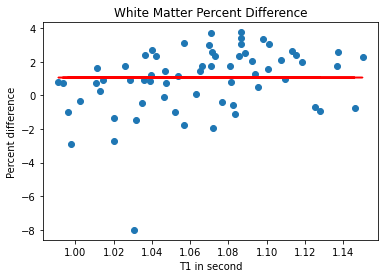

In [8]:
white_matter_percent_dif = ((GT_white_matter_series-Denoised_white_matter_series)/GT_white_matter_series)*100
m, b = np.polyfit(white_matter_percent_dif, GT_white_matter_series, 1)
plt.title('White Matter Percent Difference')
plt.scatter(GT_white_matter_series, white_matter_percent_dif)
plt.plot(GT_white_matter_series, (m*GT_white_matter_series)+b, color='red')
plt.xlabel('T1 in second') 
plt.ylabel('Percent difference')

Text(0, 0.5, 'Percent difference')

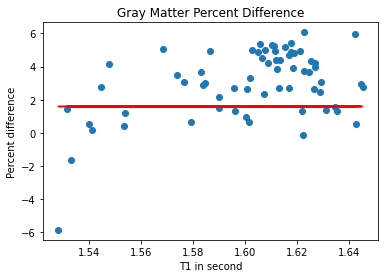

In [9]:
gray_matter_percent_dif = ((GT_gray_matter_series-Denoised_gray_matter_series)/GT_gray_matter_series)*100
m, b = np.polyfit(gray_matter_percent_dif, GT_gray_matter_series, 1)
plt.title('Gray Matter Percent Difference')
plt.scatter(GT_gray_matter_series, gray_matter_percent_dif)
plt.plot(GT_gray_matter_series, (m*GT_gray_matter_series)+b, color='red')
plt.xlabel('T1 in second') 
plt.ylabel('Percent difference')